### STAGE A PROJECT
POWER PLANT DATA EXPLORATION

Hamoye has provided the public utility dataset from the United States Energy Information Administration, for exploration to provide summary statistics and some interesting visualization with the knowledge of data science that I've learnt so far in this internship.
The major objectives given are listed below
+ Explore the operating costs of individual power plants
+ How fuel costs impact the viability of the different generation sources
+ Highlight the competitiveness of renewable electricity
+ Show how the generation mix of different utilities evolved over time

These Objectives will be achieved by answering the following question from the dataset:
+ What is the cost of fuel per mmbtu by record years?
+ Fuel quantity burned by record years
+ Fuel quantity burned by fuel type
+ Fuel cost per unit burned by fuel type and by record years
+ Fuel type burned by years
+ Top 10 plant with highest fuel cost per unit burned
+ Plant with highest fuel cost per mmbtu

#### Importing the neccessary library

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16,10)
pd.options.mode.chained_assignment = None

In [45]:
## Loading the dataset
data = pd.read_csv("Hamoye_stage1.csv")
data.head()

,Unnamed: 0,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


### Data cleaning processess
+ Data shape
+ data types
+ Numerical and categorical data
+ Data information
+ Missing data
+ Outliers
+ Duplicates

In [46]:
#checking the shape and type of the dataset
data.shape

(29523, 12)

In [47]:
data.dtypes

Unnamed: 0                        int64
record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

##### Checking the shape and datatypes,  There are 29523 rows and 12 columns. Also there are numerical and categorical data in the dataset
+ Check which columns has numerical data and
+ Which are categorical

In [48]:
#identifying the numeric data
Numeric = data.select_dtypes(include=[np.number])
Numeric_cols = Numeric.columns.values
print(Numeric_cols)

['Unnamed: 0' 'utility_id_ferc1' 'report_year' 'fuel_qty_burned'
 'fuel_mmbtu_per_unit' 'fuel_cost_per_unit_burned'
 'fuel_cost_per_unit_delivered' 'fuel_cost_per_mmbtu']


In [49]:
#Identifying non-numeric/categorical data
Non_numeric = data.select_dtypes(exclude=[np.number])
Non_numeric_cols = Non_numeric.columns.values
print(Non_numeric_cols)

['record_id' 'plant_name_ferc1' 'fuel_type_code_pudl' 'fuel_unit']


###### Checking the data information

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 12 columns):
Unnamed: 0                      29523 non-null int64
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(3), object(4)
memory usage: 2.7+ MB


#### From the data info, there are missing values in fuel unit, but this is not obvious as it is difficult for eyes to capture, so I am going to use heatmap chart to visualize those missing values

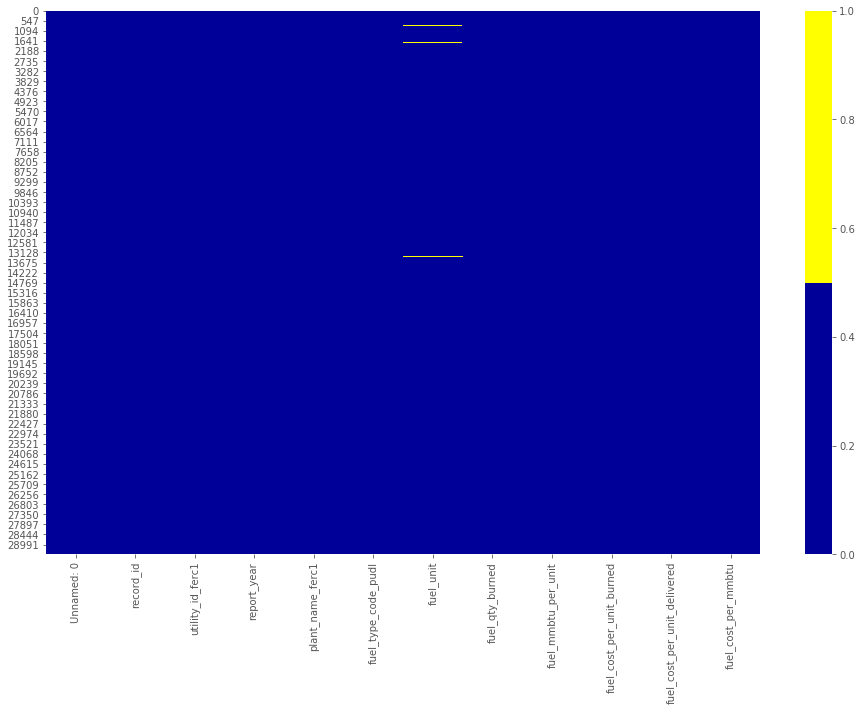

In [51]:
#Missing Data with heatmap
cols = data.columns
colours = ['#000099', '#ffff00'] # I have set color yellow as the missing, and blue not missing
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

###### It is now obvious that there are missing values in the fuel unit column. But there is another problem, I dont know how many rows that has missing values. I have to count it

In [52]:
data.isnull().sum()

Unnamed: 0                        0
record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

Now it looks better now, I know that only the fuel unit column has missing values and I know how many. 180
+ I thought about replacing or dropping it. But first, I will check the percentage of the this 180 in the observation

In [53]:
#checking the percentage of missing values in columns
for col in data.columns:
    percnt_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(percnt_missing*100)))

Unnamed: 0 - 0.0%
record_id - 0.0%
utility_id_ferc1 - 0.0%
report_year - 0.0%
plant_name_ferc1 - 0.0%
fuel_type_code_pudl - 0.0%
fuel_unit - 1.0%
fuel_qty_burned - 0.0%
fuel_mmbtu_per_unit - 0.0%
fuel_cost_per_unit_burned - 0.0%
fuel_cost_per_unit_delivered - 0.0%
fuel_cost_per_mmbtu - 0.0%


#### Since the missing value is just 1%, dropping it will not be an issue to my analysis

In [54]:
#dropping the missing values
data = data.dropna()

In [55]:
# So after dropping the na, I need to confirm if all the rows are now equal
data.isnull().sum()

Unnamed: 0                      0
record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [56]:
# Yeah, there are no missing value again, I can also confirm by checking the count of my rows
data.count()

Unnamed: 0                      29343
record_id                       29343
utility_id_ferc1                29343
report_year                     29343
plant_name_ferc1                29343
fuel_type_code_pudl             29343
fuel_unit                       29343
fuel_qty_burned                 29343
fuel_mmbtu_per_unit             29343
fuel_cost_per_unit_burned       29343
fuel_cost_per_unit_delivered    29343
fuel_cost_per_mmbtu             29343
dtype: int64

In [57]:
# checking my data to see what can be done again
data.head(3)

,Unnamed: 0,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650


##### Ok so, I will drop the Unnamed and record_id column, since I already have an index naturally from the dataframe

In [58]:
data.drop(data.columns[data.columns.str.contains('unnamed', case= False)], axis=1, inplace=True)
data.drop(data.columns[data.columns.str.contains('record_id', case= False)], axis=1, inplace=True)

In [59]:
#checking if the columns has been dropped
data.head(2)

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120


 So now its looking much more better

### Checking for outliers with boxplot
I want to see from the numerical features if there are outliers

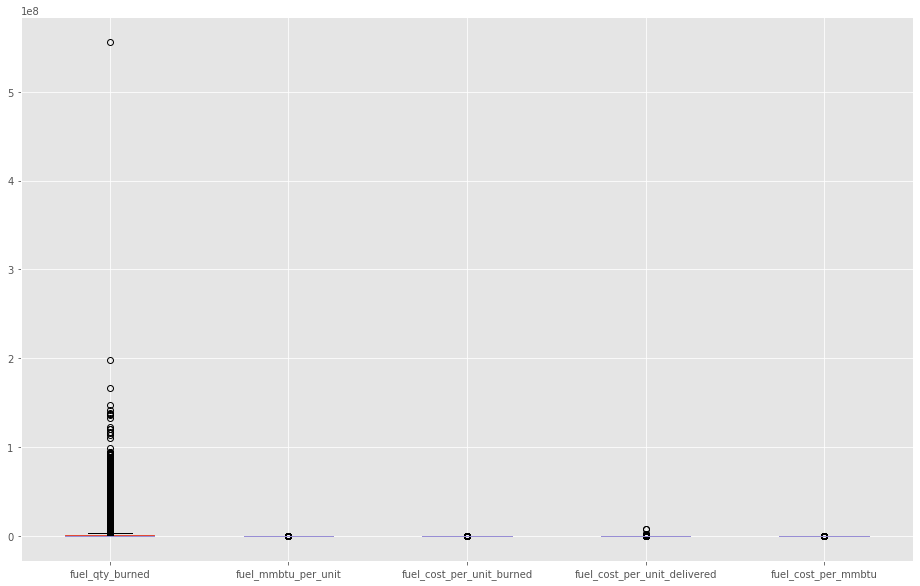

In [60]:
data[['fuel_qty_burned', 'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu']].boxplot()

It appears that the only feature with an outlier is fuel_qty_burned, I can locate the outlier by check for the maximum value in that column

In [61]:
data['fuel_qty_burned'].max()

555894250.0

##### Now I can see the outrageous value in the fuel_qty_burned. I still need to know which row is this value so i can remove it by index

In [62]:
data[data.fuel_qty_burned == data.fuel_qty_burned.max()]

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
1715,27,1995,j. m. stuart - tota,coal,ton,555894250.0,23.112,33.99,33.39,1.473


In [63]:
#The outlier value is found at row 1715, so I will just drop it
data = data.drop(1715)

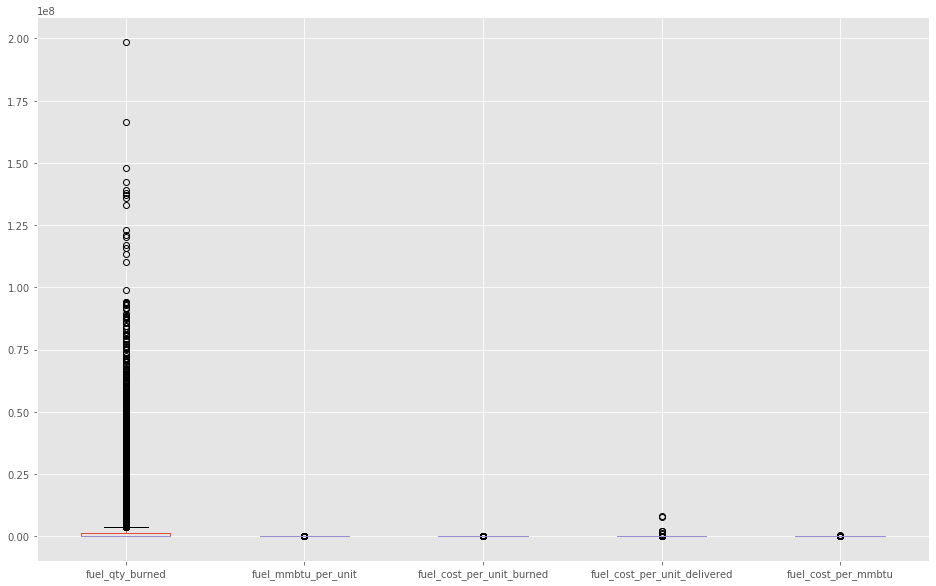

In [64]:
data[['fuel_qty_burned', 'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu']].boxplot()

##### Now the gaps in the fuel quantity burned is reasonable enough

### Removing Duplicates

In [66]:
#removing the duplicate rows in the data
clean_data = data.drop_duplicates()
clean_data.head()

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [67]:
#checking if the data has formed the new shape
clean_data.shape

(29332, 10)

#### Summary statistics
+ Observe the statistics of the dataset
+ Visualize the features correlation with heatmap


In [68]:
clean_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29332.000000,29332.000000,2.933200e+04,29332.000000,29332.000000,2.933200e+04,29332.000000
mean,118.511932,2005.821458,2.590944e+06,8.477375,209.828889,9.233742e+02,18.549937
std,74.243325,7.019263,8.185794e+06,10.537757,2863.729178,6.899945e+04,2097.760978
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.374550e+04,1.024000,5.230000,3.793000e+00,1.950000
50%,122.000000,2006.000000,2.523560e+05,5.763093,26.040000,1.749400e+01,4.141000
75%,176.000000,2012.000000,1.424353e+06,17.000000,47.181000,4.221000e+01,7.753250
max,514.000000,2018.000000,1.985774e+08,341.260000,139358.000000,7.964521e+06,359278.000000


The statistics above shows the summary of the numerical features in the dataset, at a glance it is possible to see the mean, standard deviation, maximum and the minimum, quatile range and count of all the observation

#### mean values of the fuel cost per unit burned by fuel type

In [86]:
clean_data.groupby('fuel_type_code_pudl', as_index=False)['fuel_cost_per_unit_burned'].mean()

,fuel_type_code_pudl,fuel_cost_per_unit_burned
0,coal,67.619481
1,gas,13.711852
2,nuclear,5047.223037
3,oil,169.062280
4,other,20.444221
5,waste,19.679271


### Data Visualization
+ For better visualization, I have decided not to use complex charts, this will make easy my communication and that anybody can easily understand it.

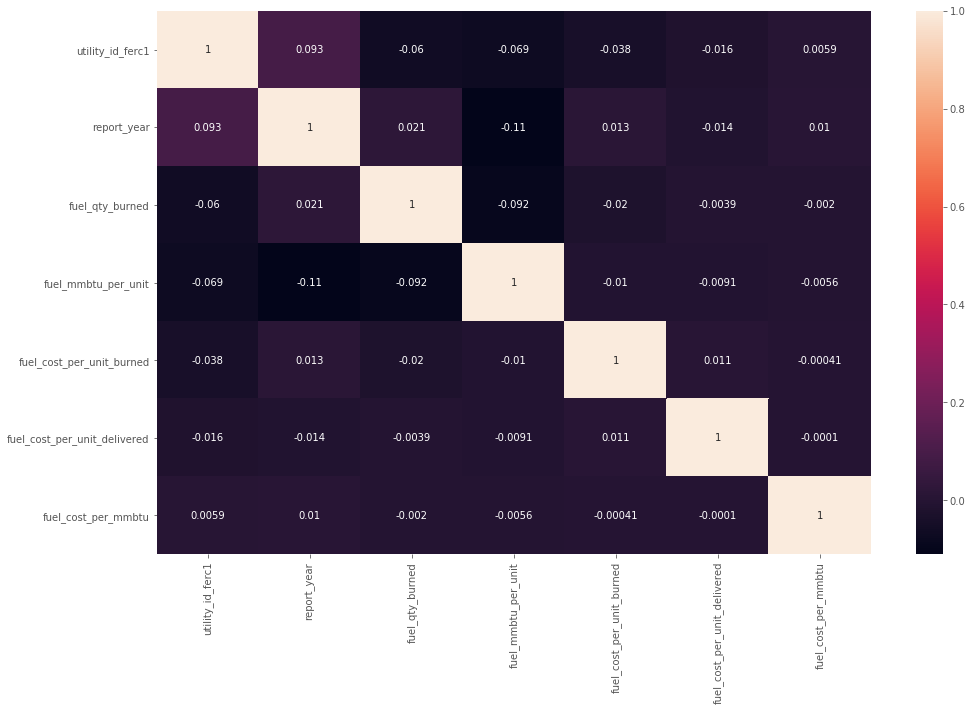

In [69]:
sns.heatmap(clean_data.corr(), annot=True)

### Narrative
This shows the correlations accross the features, some of the things to observe are:
+ fuel_cost_per_unit_delivered shows negative correlation with other features except fuel_cost_per_unit_burned
+ report year and fuel_cost_per_mmbtu has some reasonable correlation.

#### What is the most used fuel type by the power plants

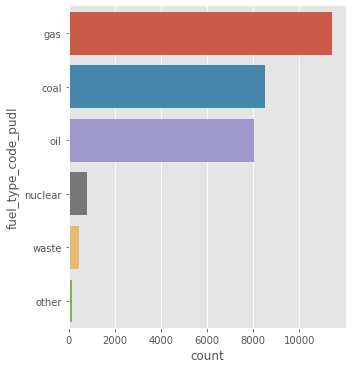

In [79]:
sns.catplot(y='fuel_type_code_pudl', kind='count',data=clean_data,order=clean_data['fuel_type_code_pudl'].value_counts().index)

### Narrative
+ Gas is the most used fuel type

### Quantity burned by years

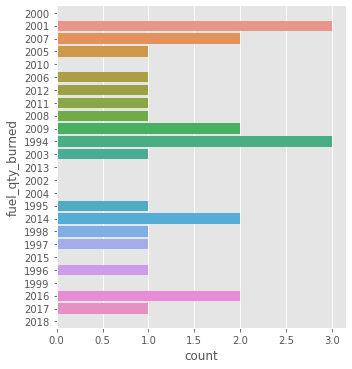

In [27]:
sns.catplot(y='fuel_qty_burned',kind='count', data=clean_data, order=clean_data['report_year'].value_counts().index)

The above visualization is not intuitive enough, I am going to group the years in 4's and visualize again with bar chart

In [70]:
labels = ["1994-1998","1998-2002","2002-2006","2006-2010","2010-2014","2014-2018"]
bins = [0,4,8,12,16,20,24]
fuel_qty_burn_by_years = clean_data.groupby(pd.cut(clean_data['fuel_qty_burned'],bins=bins,labels=labels)).size()
fuel_qty_burn_by_years.reset_index()

,fuel_qty_burned,0
0,1994-1998,63
1,1998-2002,41
2,2002-2006,33
3,2006-2010,30
4,2010-2014,18
5,2014-2018,18


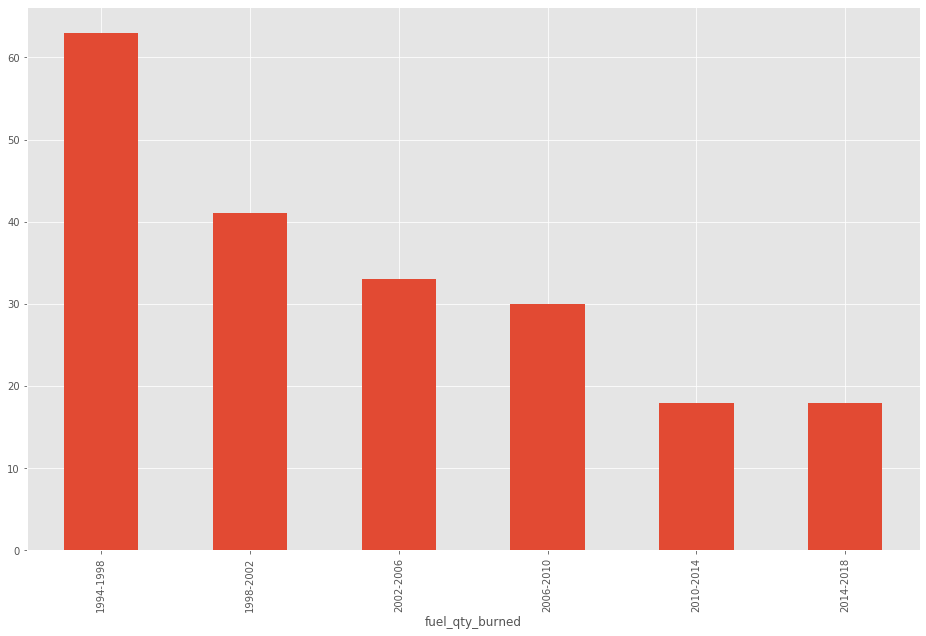

In [71]:
fuel_qty_burn_by_years.plot(kind='bar')

## Narrative
+ The quentity of fuel burnt reduced exponentially in every 4 years
+ The hihest quantity of fuel burnt was between 1994 and 1998
+ The lowest is between 2014 and 2018
+ This point out the fact that even thou the fuel quantity burned reduced exponentially, yet there increasing use of energy in these years
+ The effort of the government towards climate change is effective because, redunction in quantity of fuel burned means reduction in the emmission of greenhouse gases that causes greenhouse effect on our planet
+ this also justify the competitveness of renewable energy sources with the conventional fuel type

#### Now what is the fuel cost per mmbtu in these years?

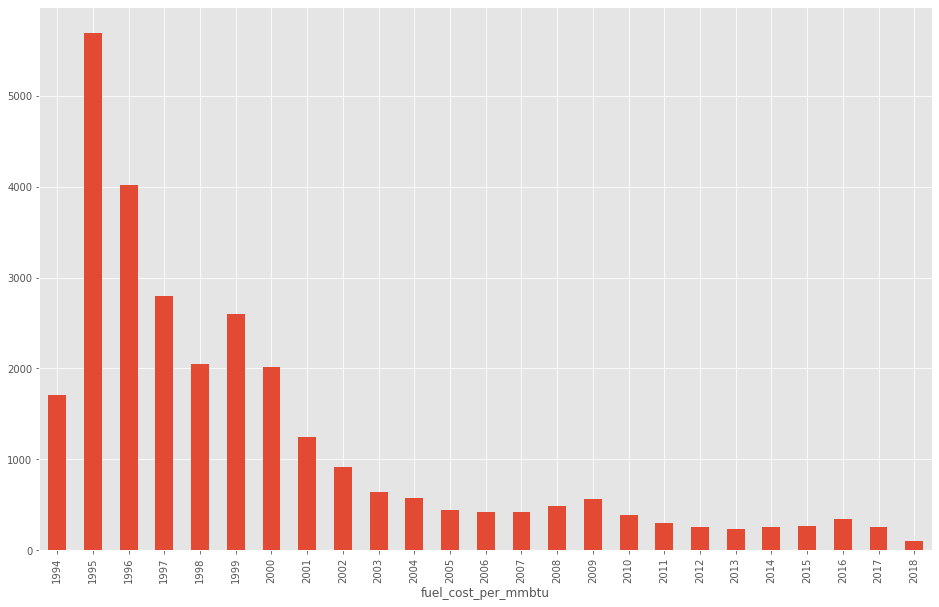

In [43]:
labels = ["1994","1995","1996","1997","1998","1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
grouped_year_fuel_cost = clean_data.groupby(pd.cut(clean_data['fuel_cost_per_mmbtu'],bins=bins,labels=labels)).size()

grouped_year_fuel_cost.plot(kind='bar')

### Narrative
+ The highest cost of fuel per mmbtu is in 1995
+ The lowest cost of fuel per mmbtu is 2018, which shows that the renewable energy is highly competing in the 2000's

#### Which fuel type has the hihest cost per unit burned

In [73]:
cost_of_fuel_burnt_type = clean_data['fuel_cost_per_unit_burned'].groupby(clean_data['fuel_type_code_pudl']).sum()
cost_of_fuel_burnt_type.reset_index()

,fuel_type_code_pudl,fuel_cost_per_unit_burned
0,coal,574224.631
1,gas,156699.039
2,nuclear,4052920.099
3,oil,1359598.855
4,other,2678.193
5,waste,8580.162


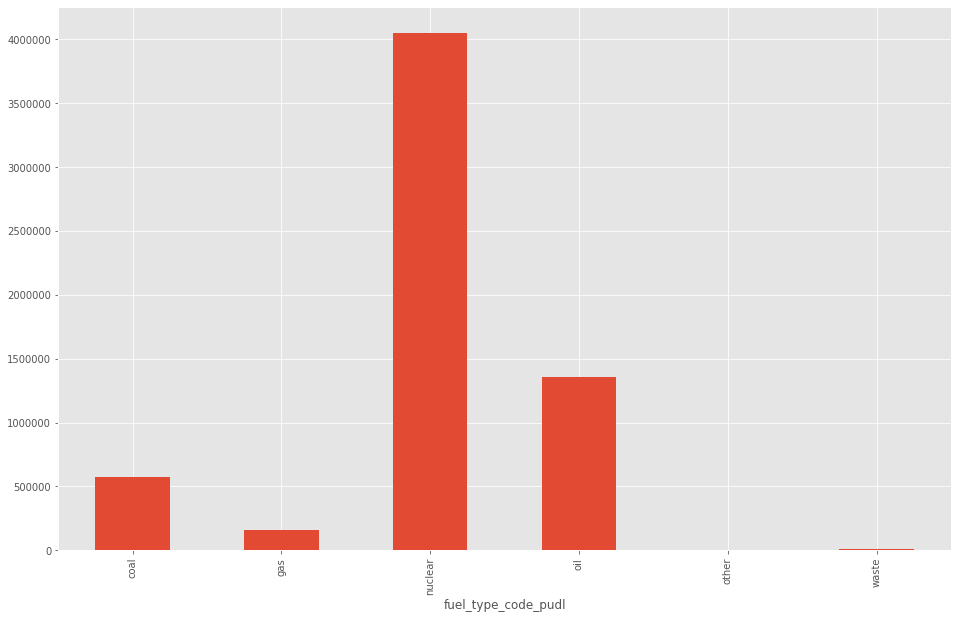

In [75]:
cost_of_fuel_burnt_type.plot(kind='bar')

### Narative
+ The nuclear type of fuel is the highest fuel type per unit burned. This shows that it is more expensive to manage nuclear plant than other plants
+ Gas is the cheapest fuel type after the waste and others unknown

### Top 10 plants with the highest fuel cost per unit burned

In [77]:
plant_top_cost_per_unit_burned = clean_data['fuel_cost_per_unit_burned'].groupby(clean_data['plant_name_ferc1']).sum()

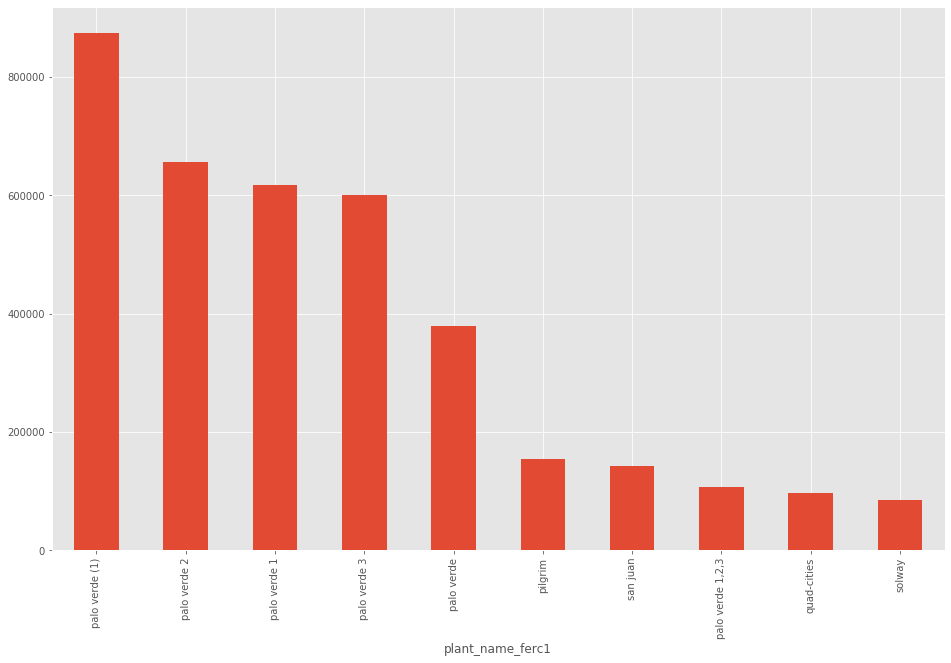

In [76]:
plant_top_cost_per_unit_burned.nlargest(10, keep="all").plot(kind='bar')

### Narrative
+ palo verde(1) power plant has the highest fuel cost per unit burned

#### Top 10 plants with highest cost per mmbtu

In [84]:
plant_top_cost_per_mmbtu = clean_data['fuel_cost_per_mmbtu'].groupby(clean_data['plant_name_ferc1']).mean()
plant_top_cost_per_mmbtu.nlargest(10, keep="all").reset_index()

,plant_name_ferc1,fuel_cost_per_mmbtu
0,rothschild,51474.193134
1,celanese ii,176.362667
2,rothschild-total,139.417935
3,peach bottom (nuc),54.680333
4,nine mile 1,54.266667
5,hope creek (nuc),51.821000
6,nine mile 2,47.900000
7,celanese i,32.635000
8,e.f. barrett,26.062000
9,aberdeen ct,25.706000


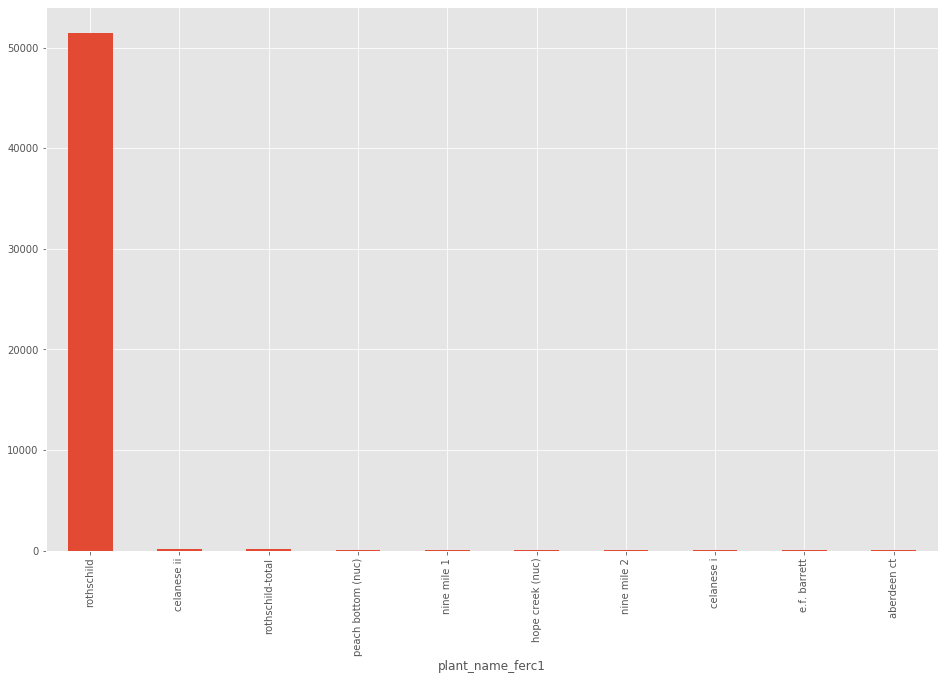

In [85]:
plant_top_cost_per_mmbtu.nlargest(10, keep="all").plot(kind='bar')

### Conclusion

In this exercise, I have explored and carried out analysis on power plant utility dataset. I know that reading through this content, you will realize that I am still new in the field of data science. However, I am remarkably stunned by how much I've learnt during the course of this project. I hope this is good enough to make me qualify to next stage, as I am looking forward to learn more and solve real life problems.

##### Appreciate you reading this!!